Answers to list of exercises 3

Authors: Rodrigo MM Santiago @rodrigommsantiago, Lucas Tavares @lucaase

In [ ]:
# Modules...
import numpy as np              # numeric
import matplotlib.pyplot as plt # plotting

# spectral power functions
from scipy.signal import spectrogram, welch

# coherency function
from scipy.signal import coherence

# z-score function
from scipy.stats import zscore

# Pearson correlation function
from scipy.stats.stats import pearsonr

# loading matlab data
from scipy.io import loadmat

# inline plotting
%matplotlib inline 

import pylab as pl          # animations
from IPython import display # display tools
from time import sleep      # pausing function

Question 1

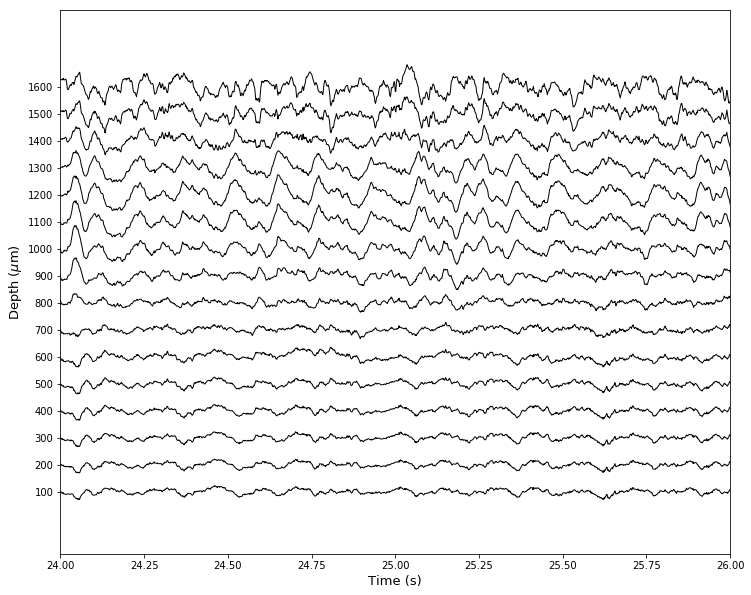

In [ ]:
LFP = loadmat('LFPprobe.mat')
srate = LFP['srate'][0,0]
dt = 1./srate
LFPprobe = LFP['LFPprobe']
t = dt*np.arange(len(LFPprobe[0]))

plt.figure(figsize=(12,10))

for ch in range(len(LFPprobe)):
    plt.plot(t,LFPprobe[ch]-ch*1000,'k',linewidth=1)

#plt.plot([96.4,96.6],[-17500,-17500],'k',linewidth=3)
plt.xlim([24,26])
plt.xlabel('Time (s)',size=13)
plt.ylabel('Depth ($\mu$m)',size=13)
plt.yticks(np.arange(-15000,0.1,1000),np.arange(1600,99,-100));
plt.gca().invert_yaxis()

Question 2

In [ ]:
plt.figure(figsize=(12,10))

for nstep in range(200):
    pl.clf() # clears screen
    for ch in range(len(LFPprobe)):
        plt.plot(t,LFPprobe[ch]-ch*1000,'k',linewidth=1)

    plt.xlim(np.array([0,2])+nstep*0.2)
    plt.xlabel('Time (s)',size=13)
    plt.ylabel('Depth ($\mu$m)',size=13)
    plt.yticks(np.arange(-15000,0.1,1000),np.arange(1600,99,-100));

    display.display(pl.gcf())       # shows display
    display.clear_output(wait=True) # holds display for next plot

Question 3

In [ ]:
PSD     = [] # PSDs for all signals
PSDnorm = [] # Normalized PSDs

for ch in range(len(LFPprobe)):
    F,Pxx = welch(LFPprobe[ch],srate,nperseg=4*srate,nfft=2**12)
    PSD.append(Pxx)
    PSDnorm.append(PSD[ch]/np.sum(PSD[ch]))

print(np.shape(PSD))

(16, 2049)


Question 4

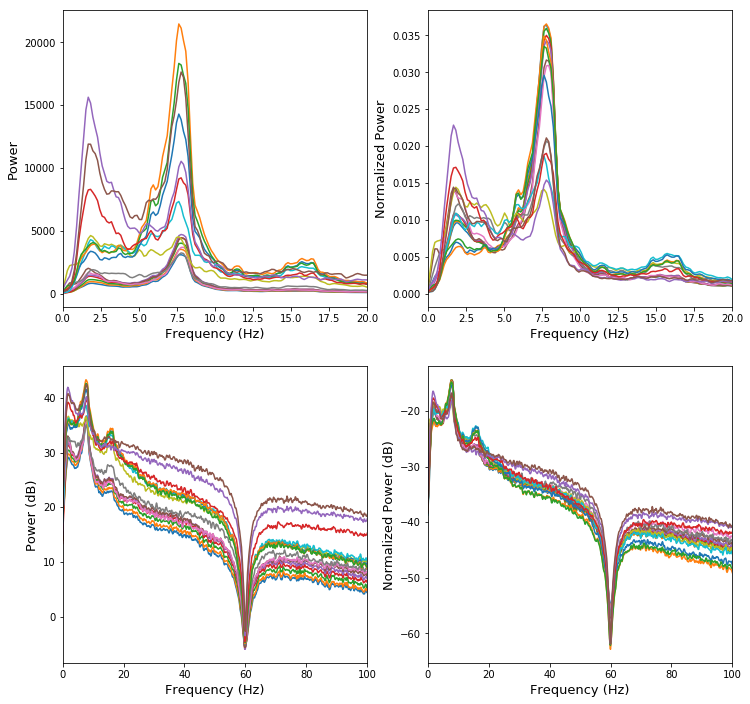

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(221)
for ch in range(len(LFPprobe)): plt.plot(F,PSD[ch])
plt.xlabel('Frequency (Hz)',size=13)
plt.ylabel('Power',size=13)
plt.xlim([0,20]);

plt.subplot(222)
for ch in range(len(LFPprobe)): plt.plot(F,PSDnorm[ch])
plt.xlabel('Frequency (Hz)',size=13)
plt.ylabel('Normalized Power',size=13)
plt.xlim([0,20]);

plt.subplot(223)
for ch in range(len(LFPprobe)): plt.plot(F,10*np.log10(PSD[ch]))
plt.xlabel('Frequency (Hz)',size=13)
plt.ylabel('Power (dB)',size=13)
plt.xlim([0,100]);

plt.subplot(224)
for ch in range(len(LFPprobe)): plt.plot(F,10*np.log10(PSDnorm[ch]))
plt.xlabel('Frequency (Hz)',size=13)
plt.ylabel('Normalized Power (dB)',size=13)
plt.xlim([0,100]);

Question 5

In [ ]:
Itheta = (F>5)*(F<10)
ThetaPower = np.mean(np.array(PSD)[:,Itheta],1)
ThetaPowerNorm = np.mean(np.array(PSDnorm)[:,Itheta],1)
print(np.shape(ThetaPower))

(16,)


Question 6

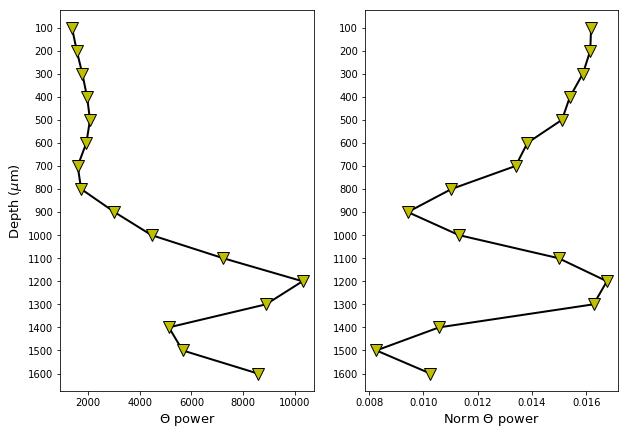

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(121)
plt.plot(ThetaPower,np.arange(-100,-1601,-100),'kv-',markersize=12,
         markerfacecolor='y',linewidth=2)
plt.yticks(np.arange(-1600,-99,100),np.arange(1600,99,-100))
plt.ylabel('Depth ($\mu$m)',size=13)
plt.xlabel('$\Theta$ power',size=13)

plt.subplot(122)
plt.plot(ThetaPowerNorm,np.arange(-100,-1601,-100),'kv-',markersize=12,
         markerfacecolor='y',linewidth=2)
plt.yticks(np.arange(-1600,-99,100),np.arange(1600,99,-100))
plt.xlabel('Norm $\Theta$ power',size=13);

Question 7

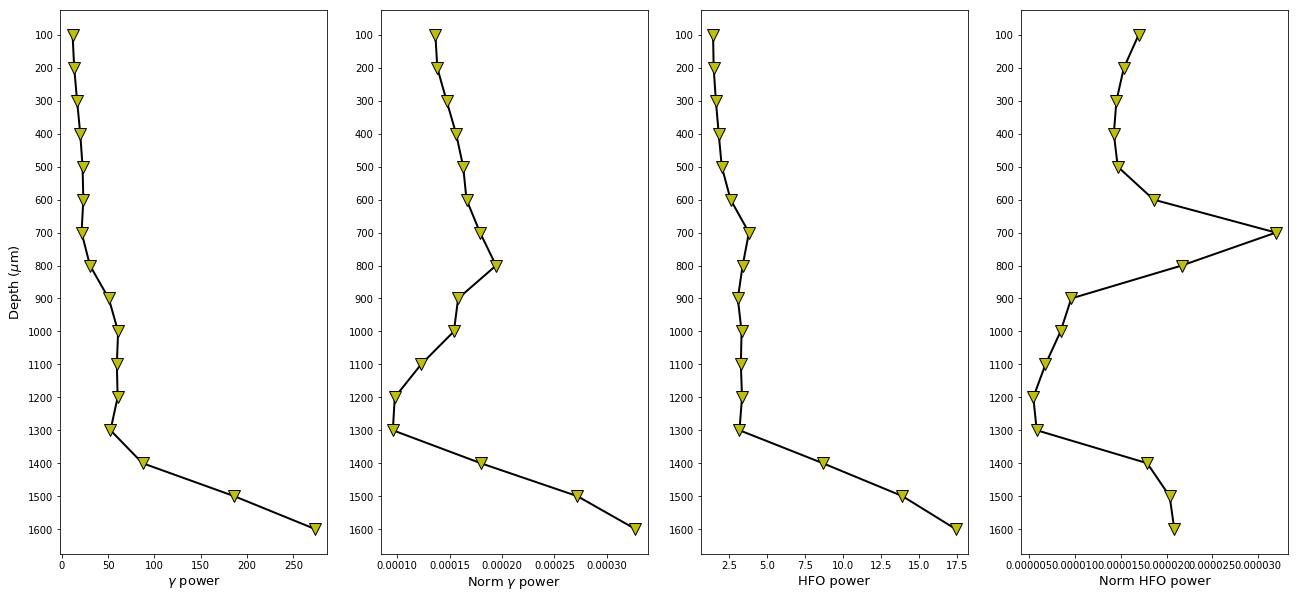

In [ ]:
Igamma = (F>30)*(F<100)
GammaPower = np.mean(np.array(PSD)[:,Igamma],1)
GammaPowerNorm = np.mean(np.array(PSDnorm)[:,Igamma],1)

plt.figure(figsize=(22,10))
plt.subplot(141)
plt.plot(GammaPower,np.arange(-100,-1601,-100),'kv-',markersize=12,
         markerfacecolor='y',linewidth=2)
plt.yticks(np.arange(-1600,-99,100),np.arange(1600,99,-100))
plt.ylabel('Depth ($\mu$m)',size=13)
plt.xlabel('$\gamma$ power',size=13)

plt.subplot(142)
plt.plot(GammaPowerNorm,np.arange(-100,-1601,-100),'kv-',markersize=12,
         markerfacecolor='y',linewidth=2)
plt.yticks(np.arange(-1600,-99,100),np.arange(1600,99,-100))
plt.xlabel('Norm $\gamma$ power',size=13)

Ihfo = (F>120)*(F<160)
HFOPower = np.mean(np.array(PSD)[:,Ihfo],1)
HFOPowerNorm = np.mean(np.array(PSDnorm)[:,Ihfo],1)

plt.subplot(143)
plt.plot(HFOPower,np.arange(-100,-1601,-100),'kv-',markersize=12,
         markerfacecolor='y',linewidth=2)
plt.yticks(np.arange(-1600,-99,100),np.arange(1600,99,-100))
plt.xlabel('HFO power',size=13)

plt.subplot(144)
plt.plot(HFOPowerNorm,np.arange(-100,-1601,-100),'kv-',markersize=12,
         markerfacecolor='y',linewidth=2)
plt.yticks(np.arange(-1600,-99,100),np.arange(1600,99,-100))
plt.xlabel('Norm HFO power',size=13);

Question 8

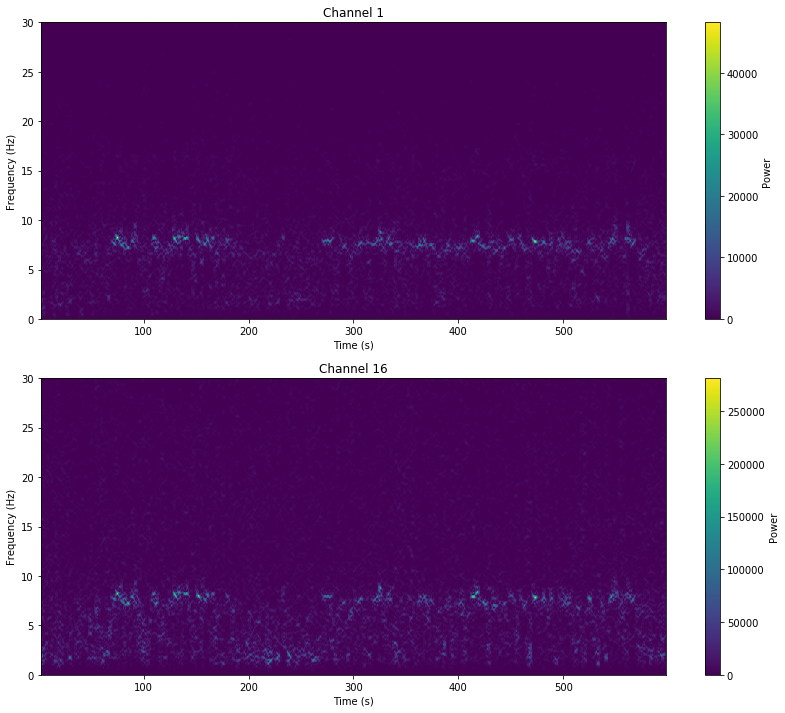

In [ ]:
window_length = 4*srate
overlap = 0.9*window_length
nfft = 2**13

F,T,TFD1 = spectrogram(LFPprobe[0],srate,nperseg=window_length,noverlap=overlap,nfft=nfft)
F,T,TFD16 = spectrogram(LFPprobe[15],srate,nperseg=window_length,noverlap=overlap,nfft=nfft)

plt.figure(figsize=(14,12))
plt.subplot(211)
plt.pcolormesh(T,F,TFD1)
plt.ylim([0,30])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power')
plt.title('Channel 1')

plt.subplot(212)
plt.pcolormesh(T,F,TFD16)
plt.ylim([0,30])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power')
plt.title('Channel 16');

Question 9

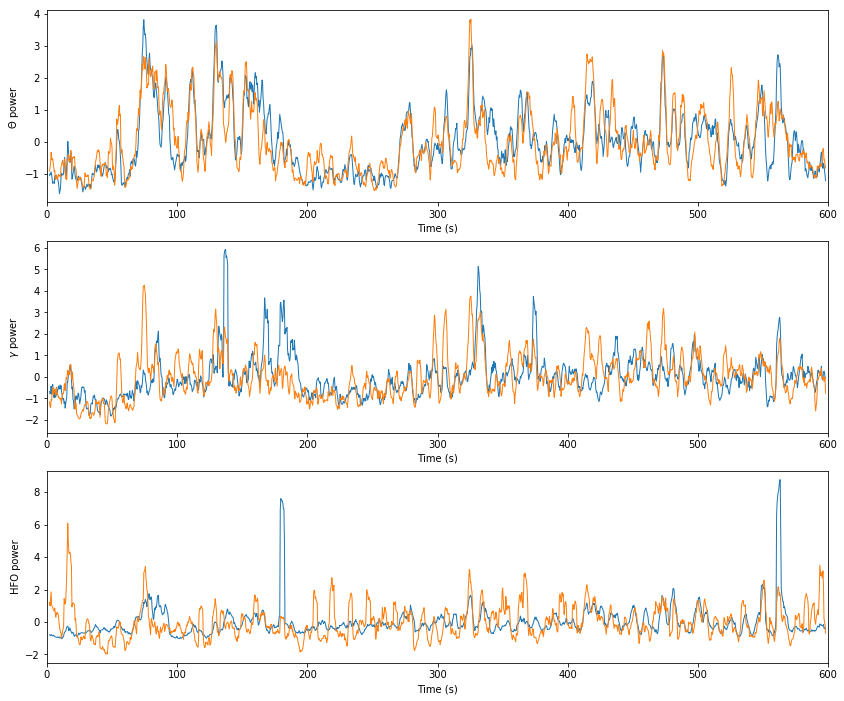

In [ ]:
Itheta = (F>5)*(F<10)
Igamma = (F>30)*(F<100)
Ihfo = (F>120)*(F<160)

Theta1 = np.mean(TFD1[Itheta,:],0)
Theta16 = np.mean(TFD16[Itheta,:],0)

Gamma1 = np.mean(TFD1[Igamma,:],0)
Gamma16 = np.mean(TFD16[Igamma,:],0)

HFO1 = np.mean(TFD1[Ihfo,:],0)
HFO16 = np.mean(TFD16[Ihfo,:],0)

plt.figure(figsize=(14,12))
plt.subplot(311)
# plt.plot(T,Theta1,linewidth=1)
# plt.plot(T,Theta16,linewidth=1)
plt.plot(T,zscore(Theta1),linewidth=1)
plt.plot(T,zscore(Theta16),linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('$\Theta$ power')
plt.xlim([0,600])

plt.subplot(312)
# plt.plot(T,Gamma1,linewidth=1)
# plt.plot(T,Gamma16,linewidth=1)
plt.plot(T,zscore(Gamma1),linewidth=1)
plt.plot(T,zscore(Gamma16),linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('$\gamma$ power')
plt.xlim([0,600])

plt.subplot(313)
# plt.plot(T,HFO1,linewidth=1)
# plt.plot(T,HFO16,linewidth=1)
plt.plot(T,zscore(HFO1),linewidth=1)
plt.plot(T,zscore(HFO16),linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('HFO power')
plt.xlim([0,600]);

Question 10

Text(0,0.5,'HFO Ch 16')

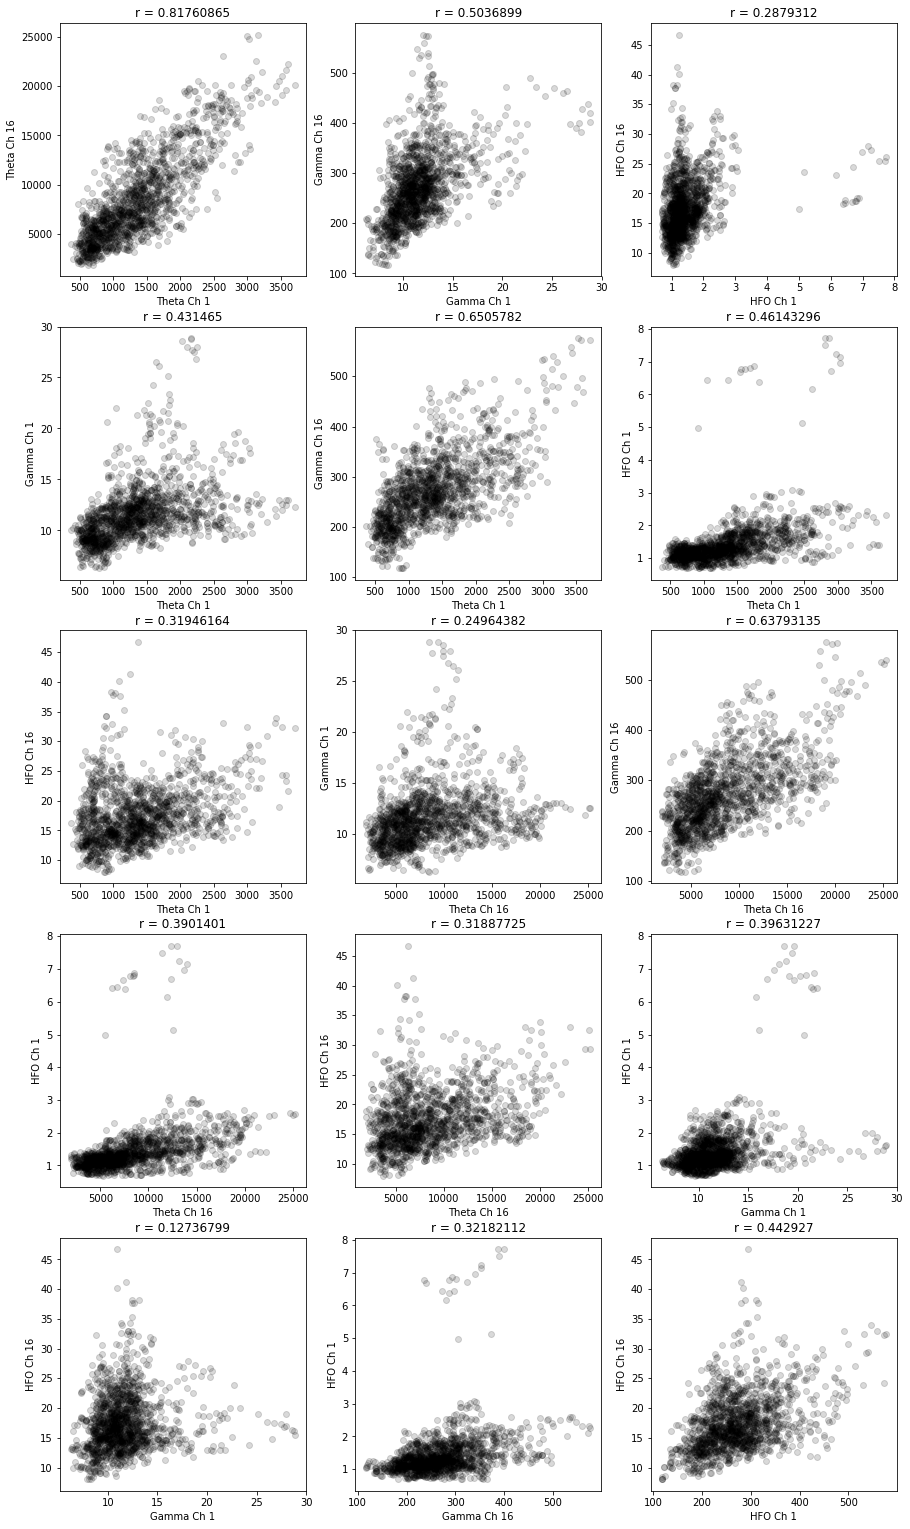

In [ ]:
plt.figure(figsize=(15,27))

plt.subplot(5,3,1)
plt.plot(Theta1,Theta16,'ko',alpha=0.15)
r, p = pearsonr(Theta1,Theta16)
plt.title('r = '+str(r))
plt.xlabel('Theta Ch 1')
plt.ylabel('Theta Ch 16')

plt.subplot(5,3,2)
plt.plot(Gamma1,Gamma16,'ko',alpha=0.15)
r, p = pearsonr(Gamma1,Gamma16)
plt.title('r = '+str(r))
plt.xlabel('Gamma Ch 1')
plt.ylabel('Gamma Ch 16')

plt.subplot(5,3,3)
plt.plot(HFO1,HFO16,'ko',alpha=0.15)
r, p = pearsonr(HFO1,HFO16)
plt.title('r = '+str(r))
plt.xlabel('HFO Ch 1')
plt.ylabel('HFO Ch 16')

plt.subplot(5,3,4)
plt.plot(Theta1,Gamma1,'ko',alpha=0.15)
r, p = pearsonr(Theta1,Gamma1)
plt.title('r = '+str(r))
plt.xlabel('Theta Ch 1')
plt.ylabel('Gamma Ch 1')

plt.subplot(5,3,5)
plt.plot(Theta1,Gamma16,'ko',alpha=0.15)
r, p = pearsonr(Theta1,Gamma16)
plt.title('r = '+str(r))
plt.xlabel('Theta Ch 1')
plt.ylabel('Gamma Ch 16')

plt.subplot(5,3,6)
plt.plot(Theta1,HFO1,'ko',alpha=0.15)
r, p = pearsonr(Theta1,HFO1)
plt.title('r = '+str(r))
plt.xlabel('Theta Ch 1')
plt.ylabel('HFO Ch 1')

plt.subplot(5,3,7)
plt.plot(Theta1,HFO16,'ko',alpha=0.15)
r, p = pearsonr(Theta1,HFO16)
plt.title('r = '+str(r))
plt.xlabel('Theta Ch 1')
plt.ylabel('HFO Ch 16')

plt.subplot(5,3,8)
plt.plot(Theta16,Gamma1,'ko',alpha=0.15)
r, p = pearsonr(Theta16,Gamma1)
plt.title('r = '+str(r))
plt.xlabel('Theta Ch 16')
plt.ylabel('Gamma Ch 1')

plt.subplot(5,3,9)
plt.plot(Theta16,Gamma16,'ko',alpha=0.15)
r, p = pearsonr(Theta16,Gamma16)
plt.title('r = '+str(r))
plt.xlabel('Theta Ch 16')
plt.ylabel('Gamma Ch 16')

plt.subplot(5,3,10)
plt.plot(Theta16,HFO1,'ko',alpha=0.15)
r, p = pearsonr(Theta16,HFO1)
plt.title('r = '+str(r))
plt.xlabel('Theta Ch 16')
plt.ylabel('HFO Ch 1')

plt.subplot(5,3,11)
plt.plot(Theta16,HFO16,'ko',alpha=0.15)
r, p = pearsonr(Theta16,HFO16)
plt.title('r = '+str(r))
plt.xlabel('Theta Ch 16')
plt.ylabel('HFO Ch 16')

plt.subplot(5,3,12)
plt.plot(Gamma1,HFO1,'ko',alpha=0.15)
r, p = pearsonr(Gamma1,HFO1)
plt.title('r = '+str(r))
plt.xlabel('Gamma Ch 1')
plt.ylabel('HFO Ch 1')

plt.subplot(5,3,13)
plt.plot(Gamma1,HFO16,'ko',alpha=0.15)
r, p = pearsonr(Gamma1,HFO16)
plt.title('r = '+str(r))
plt.xlabel('Gamma Ch 1')
plt.ylabel('HFO Ch 16')

plt.subplot(5,3,14)
plt.plot(Gamma16,HFO1,'ko',alpha=0.15)
r, p = pearsonr(Gamma16,HFO1)
plt.title('r = '+str(r))
plt.xlabel('Gamma Ch 16')
plt.ylabel('HFO Ch 1')

plt.subplot(5,3,15)
plt.plot(Gamma16,HFO16,'ko',alpha=0.15)
r, p = pearsonr(Gamma16,HFO16)
plt.title('r = '+str(r))
plt.xlabel('HFO Ch 1')
plt.ylabel('HFO Ch 16')

Question 11

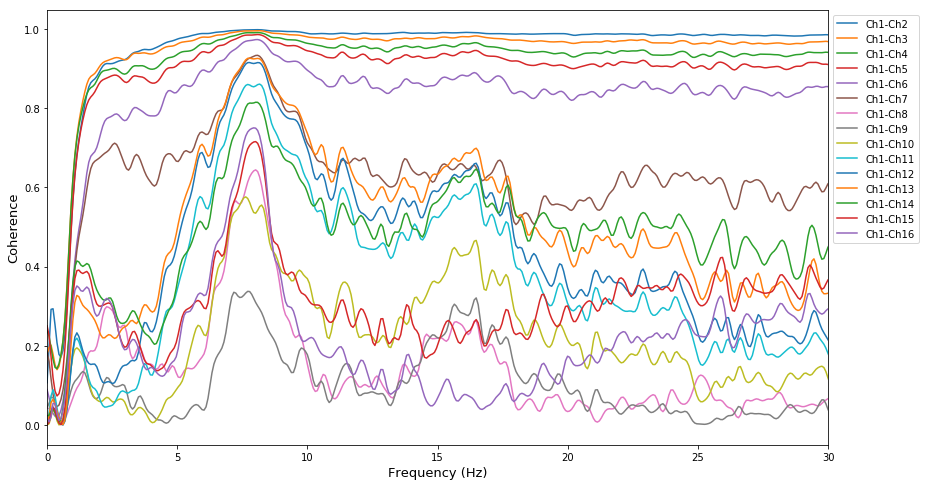

In [ ]:
LFP = loadmat('LFPprobe.mat')
srate = LFP['srate'][0,0]
LFPprobe = LFP['LFPprobe']

plt.figure(figsize=(14,8))
CxyAll = []
Label = []
for ch in range(1,16):
    Label.append('Ch1-Ch'+str(ch+1))
    F, Cxy = coherence(LFPprobe[0],LFPprobe[ch],srate,nperseg=4*srate,nfft=2**13)
    plt.plot(F,Cxy,label=Label[ch-1])
    CxyAll.append(Cxy)

plt.xlim([0,30])
plt.xlabel('Frequency (Hz)',size=13)
plt.ylabel('Coherence',size=13)
plt.legend(bbox_to_anchor=(1,1), loc="upper left");

Question 12

In [ ]:
CxyAll = np.array(CxyAll)
Itheta = (F>5)*(F<10)     
Igamma = (F>30)*(F<100) 

MeanThetaCoh = np.mean(CxyAll[:,Itheta],1)
MeanGammaCoh = np.mean(CxyAll[:,Igamma],1)

Question 13

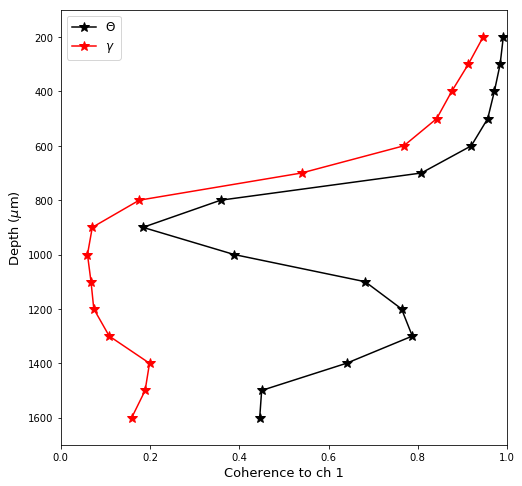

In [ ]:
plt.figure(figsize=(8,8))

plt.plot(MeanThetaCoh,np.arange(200,1601,100),'k*-',markersize=10,label='$\Theta$')
plt.plot(MeanGammaCoh,np.arange(200,1601,100),'r*-',markersize=10,label='$\gamma$')
plt.legend(fontsize='large')
plt.xlabel('Coherence to ch 1',size=13)
plt.ylabel('Depth ($\mu$m)',size=13)
plt.xlim([0,1])
plt.ylim([100,1700])
plt.gca().invert_yaxis()

Question 14

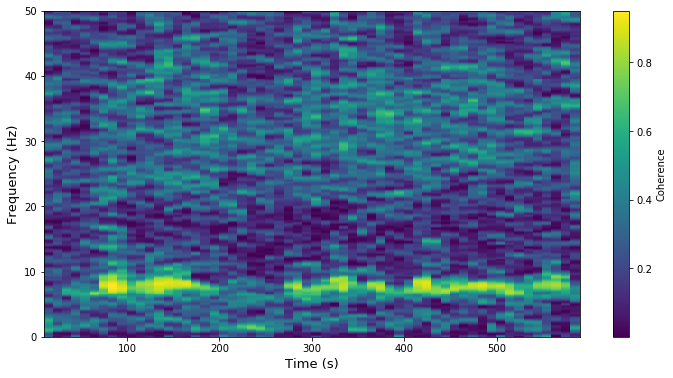

In [ ]:
dt = 1./srate
t = dt*np.arange(len(LFPprobe[0]))
win    = 20*srate
step   = 10*srate
Nwin   = int((len(LFPprobe[0])-win)/step+1)
nfft   = 2**12
cohwin = 2*srate

Coherogram = []
T = []
for nwin in range(Nwin):
    temp = np.arange(win)+nwin*int(step)
    F, Cxy = coherence(LFPprobe[0,temp],LFPprobe[15,temp],
                       srate,nperseg=cohwin,nfft=nfft)
    Coherogram.append(Cxy.T)
    T.append(np.mean(temp*dt))

plt.figure(figsize=(12,6))
plt.pcolormesh(T,F,np.transpose(Coherogram))
plt.ylim([0,50])
plt.xlabel('Time (s)',size=13)
plt.ylabel('Frequency (Hz)',size=13)
plt.colorbar(label='Coherence');

Question 15

In [ ]:
MeanCoherenceMatrixTheta = np.zeros((16,16))
MeanCoherenceMatrixGamma = np.zeros((16,16))
for ch1 in range(15):
    for ch2 in range(ch1+1,16):
        F, Cxy = coherence(LFPprobe[ch1],LFPprobe[ch2],
                           srate,nperseg=4*srate,nfft=nfft)
        MeanCoherenceMatrixTheta[ch1,ch2] = np.mean(Cxy[Itheta])
        MeanCoherenceMatrixGamma[ch1,ch2] = np.mean(Cxy[Igamma])

# Transform null values into 'bad data'
MeanCoherenceMatrixTheta = np.ma.masked_where(MeanCoherenceMatrixTheta <= 0.0,
                                              MeanCoherenceMatrixTheta)

MeanCoherenceMatrixGamma = np.ma.masked_where(MeanCoherenceMatrixGamma <= 0.0,
                                              MeanCoherenceMatrixGamma)

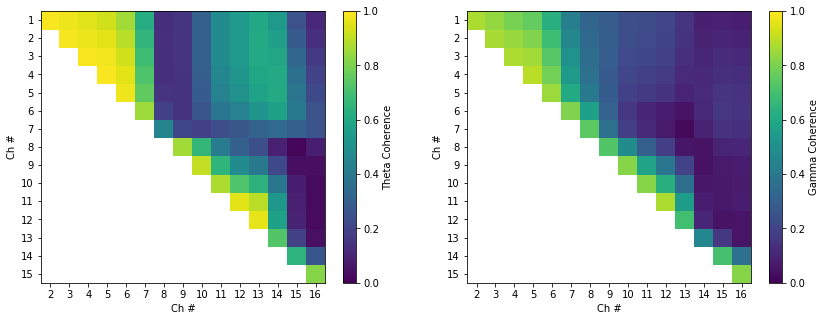

In [ ]:
plt.figure(figsize=(14,5))

# updates color map for'bad data' to be plotted as white
cmap = plt.cm.get_cmap('viridis')
cmap.set_bad(color='white')

plt.subplot(121)
plt.pcolormesh(MeanCoherenceMatrixTheta[::-1])
plt.xlim([1,16])
plt.ylim([1,16])
plt.xticks(np.arange(1,16)+0.5,np.arange(2,17))
plt.yticks(np.arange(1,16)+0.5,np.arange(1,16)[::-1])
plt.colorbar(label='Theta Coherence')
plt.clim(0,1)
plt.xlabel('Ch #')
plt.ylabel('Ch #')

plt.subplot(122)
plt.pcolormesh(MeanCoherenceMatrixGamma[::-1])
plt.xlim([1,16])
plt.ylim([1,16])
plt.xticks(np.arange(1,16)+0.5,np.arange(2,17))
plt.yticks(np.arange(1,16)+0.5,np.arange(1,16)[::-1])
plt.colorbar(label='Gamma Coherence')
plt.clim(0,1)
plt.xlabel('Ch #')
plt.ylabel('Ch #');